In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='inner')

# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)


# separar data em ano, mes e dia

train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)

train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())

test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)

test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())

train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])

train['weather_description'].unique()


train['Injeção na rede (kWh)'] = train['Injeção na rede (kWh)'].fillna('None')

dict_target = {"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)


# 3 - ...

## Outliers

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             1752 non-null   float64
 1   Horário Económico (kWh)  1752 non-null   float64
 2   Autoconsumo (kWh)        1752 non-null   float64
 3   temp                     1752 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 1752 non-null   float64
 6   temp_max                 1752 non-null   float64
 7   pressure                 1752 non-null   int64  
 8   humidity                 1752 non-null   int64  
 9   wind_speed               1752 non-null   float64
 10  clouds_all               1752 non-null   int64  
 11  weather_description      1752 non-null   int64  
 12  ano                      1752 non-null   int32  
 13  mes                      1752 non-null   int32  
 14  dia                     

count    1752.000000
mean        0.285438
std         0.482109
min         0.000000
25%         0.000000
50%         0.000000
75%         0.420500
max         3.381000
Name: Normal (kWh), dtype: float64

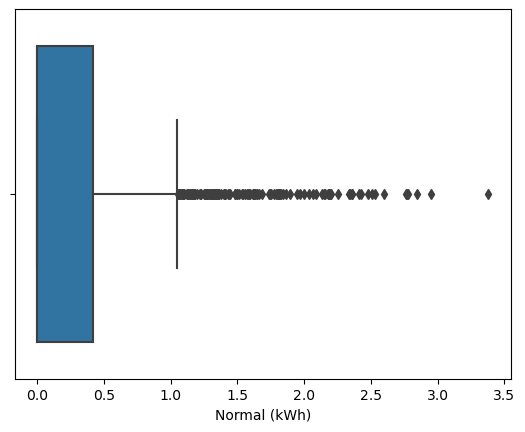

In [122]:
sns.boxplot(x=test["Normal (kWh)"])
test["Normal (kWh)"].describe()

count    1752.000000
mean        0.234958
std         0.388916
min         0.000000
25%         0.000000
50%         0.000000
75%         0.342250
max         2.771000
Name: Horário Económico (kWh), dtype: float64

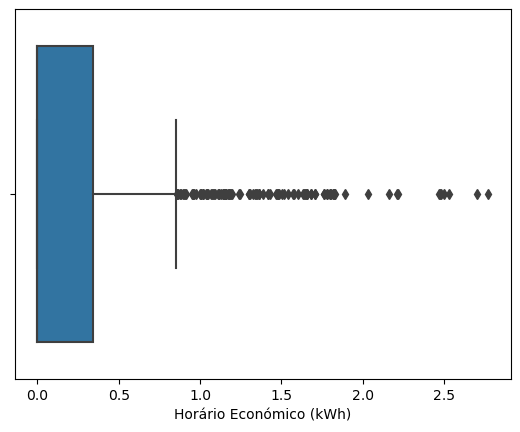

In [123]:
sns.boxplot(x=test["Horário Económico (kWh)"])
test["Horário Económico (kWh)"].describe()

count    1752.000000
mean        0.114521
std         0.190091
min         0.000000
25%         0.000000
50%         0.000000
75%         0.221250
max         1.070000
Name: Autoconsumo (kWh), dtype: float64

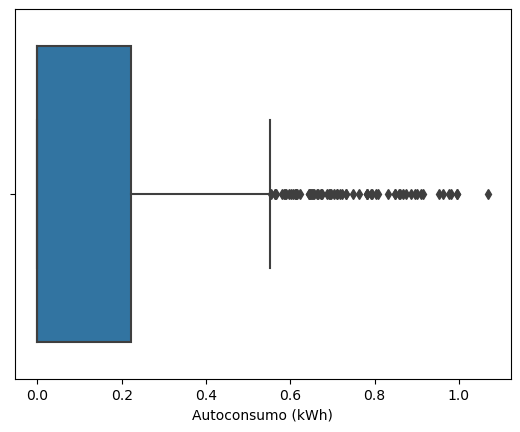

In [124]:
sns.boxplot(x=test["Autoconsumo (kWh)"])
test["Autoconsumo (kWh)"].describe()

count    1752.000000
mean       10.599606
std         3.715156
min         0.930000
25%         7.877500
50%        10.950000
75%        13.292500
max        20.610000
Name: temp, dtype: float64

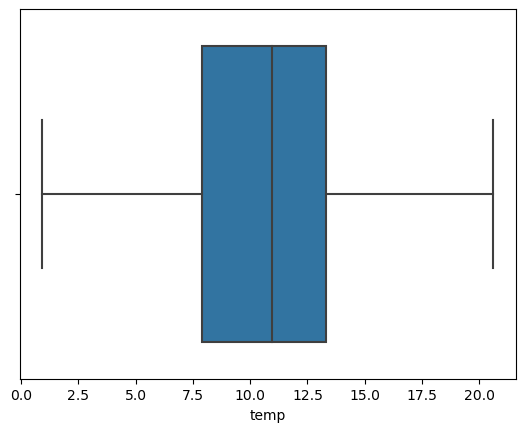

In [125]:
sns.boxplot(x=test["temp"])
test["temp"].describe()

count    1752.000000
mean        9.543265
std         4.191224
min        -1.790000
25%         6.217500
50%        10.135000
75%        12.742500
max        19.790000
Name: feels_like, dtype: float64

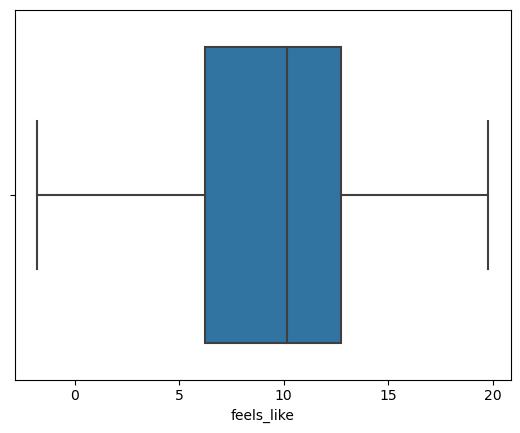

In [126]:
sns.boxplot(x=test["feels_like"])
test["feels_like"].describe()

count    1752.000000
mean        9.177917
std         4.021176
min        -0.850000
25%         6.247500
50%         9.710000
75%        12.320000
max        20.010000
Name: temp_min, dtype: float64

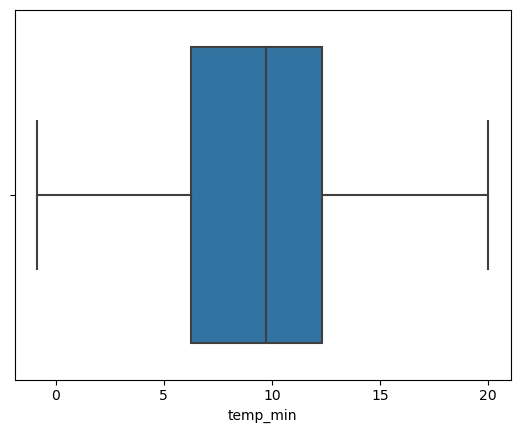

In [127]:
sns.boxplot(x=test["temp_min"])
test["temp_min"].describe()

count    1752.000000
mean       11.643813
std         3.596882
min         3.340000
25%         8.900000
50%        11.820000
75%        14.040000
max        22.010000
Name: temp_max, dtype: float64

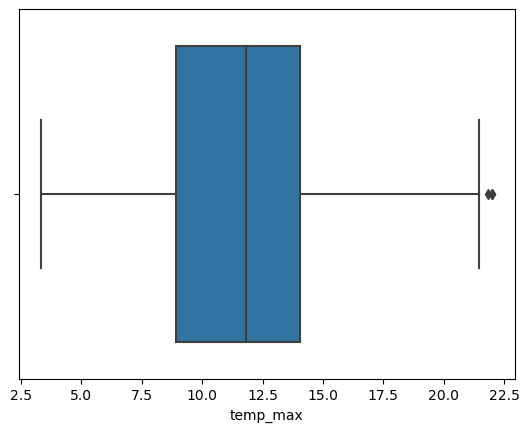

In [128]:
sns.boxplot(x=test["temp_max"])
test["temp_max"].describe()

count    1752.000000
mean     1023.493721
std         6.650873
min      1006.000000
25%      1020.000000
50%      1024.000000
75%      1029.000000
max      1036.000000
Name: pressure, dtype: float64

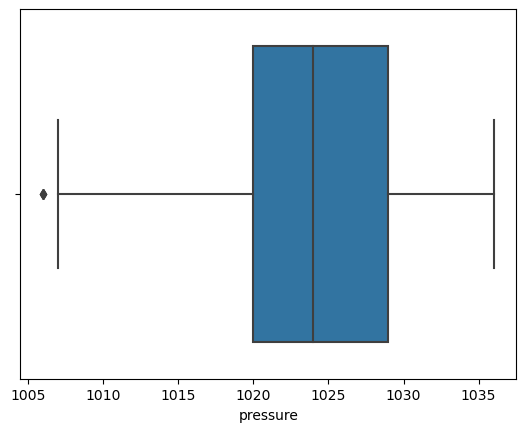

In [129]:
sns.boxplot(x=test["pressure"])
test["pressure"].describe()

count    1752.000000
mean       75.639840
std        17.415468
min        23.000000
25%        62.000000
50%        81.000000
75%        91.000000
max        97.000000
Name: humidity, dtype: float64

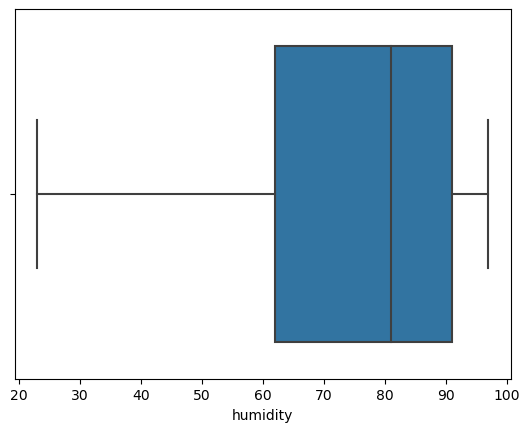

In [130]:
sns.boxplot(x=test["humidity"])
test["humidity"].describe()

count    1752.000000
mean        2.873613
std         1.620450
min         0.120000
25%         1.800000
50%         2.490000
75%         3.500000
max        10.320000
Name: wind_speed, dtype: float64

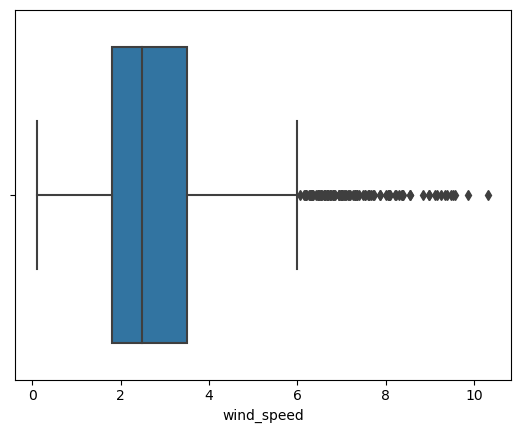

In [131]:
sns.boxplot(x=test["wind_speed"])
test["wind_speed"].describe()

count    1752.000000
mean       44.489726
std        42.972438
min         0.000000
25%         0.000000
50%        35.000000
75%        96.000000
max       100.000000
Name: clouds_all, dtype: float64

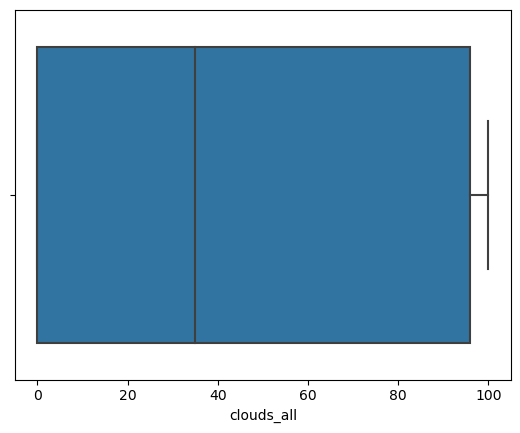

In [132]:
sns.boxplot(x=test["clouds_all"])
test["clouds_all"].describe()

## Normalização

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             1752 non-null   float64
 1   Horário Económico (kWh)  1752 non-null   float64
 2   Autoconsumo (kWh)        1752 non-null   float64
 3   temp                     1752 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 1752 non-null   float64
 6   temp_max                 1752 non-null   float64
 7   pressure                 1752 non-null   int64  
 8   humidity                 1752 non-null   int64  
 9   wind_speed               1752 non-null   float64
 10  clouds_all               1752 non-null   int64  
 11  weather_description      1752 non-null   int64  
 12  ano                      1752 non-null   int32  
 13  mes                      1752 non-null   int32  
 14  dia                     

In [134]:
test['Normal (kWh)'] = (test['Normal (kWh)'] - test['Normal (kWh)'].mean()) / (test['Normal (kWh)'].max() - test['Normal (kWh)'].min())
train['Normal (kWh)'] = (train['Normal (kWh)'] - train['Normal (kWh)'].mean()) / (train['Normal (kWh)'].max() - train['Normal (kWh)'].min())

test['Horário Económico (kWh)'] = (test['Horário Económico (kWh)'] - test['Horário Económico (kWh)'].mean()) / (test['Horário Económico (kWh)'].max() - test['Horário Económico (kWh)'].min())
train['Horário Económico (kWh)'] = (train['Horário Económico (kWh)'] - train['Horário Económico (kWh)'].mean()) / (train['Horário Económico (kWh)'].max() - train['Horário Económico (kWh)'].min())

test['Autoconsumo (kWh)'] = (test['Autoconsumo (kWh)'] - test['Autoconsumo (kWh)'].mean()) / (test['Autoconsumo (kWh)'].max() - test['Autoconsumo (kWh)'].min())
train['Autoconsumo (kWh)'] = (train['Autoconsumo (kWh)'] - train['Autoconsumo (kWh)'].mean()) / (train['Autoconsumo (kWh)'].max() - train['Autoconsumo (kWh)'].min())

test['temp'] = (test['temp'] - test['temp'].mean()) / (test['temp'].max() - test['temp'].min())
train['temp'] = (train['temp'] - train['temp'].mean()) / (train['temp'].max() - train['temp'].min())

test['feels_like'] = (test['feels_like'] - test['feels_like'].mean()) / (test['feels_like'].max() - test['feels_like'].min())
train['feels_like'] = (train['feels_like'] - train['feels_like'].mean()) / (train['feels_like'].max() - train['feels_like'].min())

test['temp_min'] = (test['temp_min'] - test['temp_min'].mean()) / (test['temp_min'].max() - test['temp_min'].min())
train['temp_min'] = (train['temp_min'] - train['temp_min'].mean()) / (train['temp_min'].max() - train['temp_min'].min())

test['temp_max'] = (test['temp_max'] - test['temp_max'].mean()) / (test['temp_max'].max() - test['temp_max'].min())
train['temp_max'] = (train['temp_max'] - train['temp_max'].mean()) / (train['temp_max'].max() - train['temp_max'].min())

test['pressure'] = (test['pressure'] - test['pressure'].mean()) / (test['pressure'].max() - test['pressure'].min())
train['pressure'] = (train['pressure'] - train['pressure'].mean()) / (train['pressure'].max() - train['pressure'].min())

test['humidity'] = (test['humidity'] - test['humidity'].mean()) / (test['humidity'].max() - test['humidity'].min())
train['humidity'] = (train['humidity'] - train['humidity'].mean()) / (train['humidity'].max() - train['humidity'].min())

test['wind_speed'] = (test['wind_speed'] - test['wind_speed'].mean()) / (test['wind_speed'].max() - test['wind_speed'].min())
train['wind_speed'] = (train['wind_speed'] - train['wind_speed'].mean()) / (train['wind_speed'].max() - train['wind_speed'].min())

test['clouds_all'] = (test['clouds_all'] - test['clouds_all'].mean()) / (test['clouds_all'].max() - test['clouds_all'].min())
train['clouds_all'] = (train['clouds_all'] - train['clouds_all'].mean()) / (train['clouds_all'].max() - train['clouds_all'].min())


In [135]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1.752000e+03,1752.000000,1752.0,1752.000000,1752.000000,1752.000000,1752.000000
mean,-4.562560e-18,5.069512e-18,-1.318073e-17,-3.650048e-17,4.055609e-17,8.111218e-18,6.894536e-17,7.543433e-16,4.461170e-17,1.825024e-17,3.244487e-17,4.935502,2023.0,1.767123,13.794521,11.500000,2.972603
std,1.425936e-01,1.403522e-01,1.776549e-01,1.887783e-01,1.942180e-01,1.927697e-01,1.926557e-01,2.216958e-01,2.353442e-01,1.588677e-01,4.297244e-01,2.296636,0.0,0.750019,8.486023,6.924163,2.034354
min,-8.442424e-02,-8.479189e-02,-1.070291e-01,-4.913418e-01,-5.251745e-01,-4.807247e-01,-4.447677e-01,-5.831240e-01,-7.113492e-01,-2.699621e-01,-4.448973e-01,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,-8.442424e-02,-8.479189e-02,-1.070291e-01,-1.383184e-01,-1.541133e-01,-1.404802e-01,-1.469637e-01,-1.164574e-01,-1.843222e-01,-1.052562e-01,-4.448973e-01,3.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,-8.442424e-02,-8.479189e-02,-1.070291e-01,1.780456e-02,2.742054e-02,2.550735e-02,9.436916e-03,1.687595e-02,7.243459e-02,-3.760912e-02,-9.489726e-02,5.000000,2023.0,2.000000,13.000000,11.500000,3.000000
75%,3.994725e-02,3.871948e-02,9.974662e-02,1.368340e-01,1.482500e-01,1.506272e-01,1.283443e-01,1.835426e-01,2.075697e-01,6.141049e-02,5.151027e-01,7.000000,2023.0,2.000000,21.000000,17.250000,5.000000
max,9.155758e-01,9.152081e-01,8.929709e-01,5.086582e-01,4.748255e-01,5.192753e-01,5.552323e-01,4.168760e-01,2.886508e-01,7.300379e-01,5.551027e-01,7.000000,2023.0,3.000000,31.000000,23.000000,6.000000


In [136]:
train.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,1.101600e+04,1.101600e+04,1.101600e+04,11016.000000,1.101600e+04,1.101600e+04,1.101600e+04,1.101600e+04,1.101600e+04,1.101600e+04,1.101600e+04,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,6.450097e-18,-4.031311e-18,-7.740117e-18,0.758987,-3.870058e-17,1.161018e-17,-4.773072e-17,-1.161018e-17,2.838043e-16,8.514129e-17,-2.580039e-18,4.644070e-17,4.374818,2021.795207,7.433551,15.803922,11.500000,3.004357
std,1.074987e-01,3.894984e-02,1.482904e-01,1.281918,1.420422e-01,1.439536e-01,1.326556e-01,1.536563e-01,1.550845e-01,2.008427e-01,1.337100e-01,4.055300e-01,2.403911,0.403569,3.578335,8.835905,6.922501,1.994632
min,-6.222026e-02,-2.288821e-02,-9.841786e-02,0.000000,-3.913889e-01,-4.139905e-01,-3.970842e-01,-3.977592e-01,-6.099151e-01,-7.107496e-01,-2.365977e-01,-5.400091e-01,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,-6.222026e-02,-2.288821e-02,-9.841786e-02,0.000000,-1.012334e-01,-9.925019e-02,-9.301564e-02,-1.096236e-01,-8.491512e-02,-1.305027e-01,-9.529337e-02,-4.700091e-01,3.000000,2022.000000,4.000000,8.000000,5.750000,1.000000
50%,-6.222026e-02,-2.288821e-02,-9.841786e-02,0.000000,-1.376736e-02,-1.371480e-02,9.351057e-04,-2.562558e-02,-9.915123e-03,5.468253e-02,-2.464120e-02,5.999092e-02,5.000000,2022.000000,8.000000,16.000000,11.500000,3.000000
75%,3.436541e-02,1.838436e-02,9.201838e-02,2.000000,7.616602e-02,7.888630e-02,8.819421e-02,7.606934e-02,9.008488e-02,1.781393e-01,6.775010e-02,4.399909e-01,7.000000,2022.000000,11.000000,23.000000,17.250000,5.000000
max,9.377797e-01,9.771118e-01,9.015821e-01,4.000000,6.086111e-01,5.860095e-01,6.029158e-01,6.022408e-01,3.900849e-01,2.892504e-01,7.634023e-01,4.599909e-01,7.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [138]:
train_feat = train.drop(['Injeção na rede (kWh)'], axis = 1)
train_target = train[['Injeção na rede (kWh)']]

x_train = train_feat
y_train= np.ravel(train_target) 

In [139]:
# sns.heatmap(train_target.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## SVM

In [140]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=1000),param_grid,refit=True,verbose=3)

In [141]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  40.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  25.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  23.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  20.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=  20.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   6.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   6.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.710 total time=   7.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   9.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   9.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.725 total time=  10.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
predictions = grid.predict(test)

predictions

## Random Forest

In [ ]:
modelRandomForest = RandomForestClassifier(n_estimators = 500)
scores = cross_val_score(modelRandomForest, x_train, y_train, cv=10)
print("Result for Random Forest: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
modelRandomForest.fit(x_train,y_train)
predictions = modelRandomForest.predict(test)

predictions

## Redes Neuronais

In [ ]:
def build_model(activation = 'relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 5, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation))
    
    model.compile(loss = 'mae', optimizer = tf.optimizers.Adam(learning_rate = learning_rate), metrics = ['mae','mse'])
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                96        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [ ]:
model = KerasRegressor(model = build_model, batch_size = 32,validation_split = 0.2, epochs = 20)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf,scoring='neg_mean_absolute_error', refit= 'True', verbose = 1)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/scikeras/wrappers.py", line 843, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/scikeras/wrappers.py", line 1723, in _validate_data
    return super()._validate_data(X=X, y=y, reset=reset, y_numeric=True)
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/scikeras/wrappers.py", line 616, in _validate_data
    X, y = check_X_y(
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1173, in _check_y
    y = check_array(
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 959, in check_array
    _assert_all_finite(
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/home/gsenra/miniconda3/envs/DAAenv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)